In [89]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random
from sklearn.preprocessing import  MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import regularizers

In [90]:
df = pd.read_csv("case_time_series.csv")

In [91]:
df['Date'] = pd.to_datetime(df['Date']+'2020')
df.set_index('Date',inplace=True)

In [92]:
df

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,
2020-01-30,2020-01-30,1,1,0,0,0,0
2020-01-31,2020-01-31,0,1,0,0,0,0
2020-02-01,2020-02-01,0,1,0,0,0,0
2020-02-02,2020-02-02,1,2,0,0,0,0
2020-02-03,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
2020-11-17,2020-11-17,38548,8912697,44753,8332928,472,130441
2020-11-18,2020-11-18,45366,8958063,48675,8381603,586,131027
2020-11-19,2020-11-19,46185,9004248,45246,8426849,582,131609


In [93]:
window = 16
def create(train,window_size=window):
    train_X = []
    train_Y = []
    for i in range(len(train)-window_size-1):
        train_X.append(train[i:i+window_size])
        train_Y.append(train[i+window_size+1])
    return np.array(train_X),np.array(train_Y)

In [94]:
len(df)

297

In [95]:
length = int(len(df)*0.8)
train = np.array(df[:length]["Total Confirmed"])
test = np.array(df[length:]["Total Confirmed"])

In [96]:
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train.reshape(-1,1))
test = scaler.transform(test.reshape(-1,1))

In [97]:
train_x,train_y = create(train)

In [98]:
c = list(zip(train_x,train_y))
random.shuffle(c)
train_x,train_y = zip(*c)
train_x = np.array(train_x)
train_y = np.array(train_y)

In [99]:
train_x.shape

(220, 16, 1)

In [100]:
model_lstm = Sequential([
    LSTM(256,input_shape=(window,1)),
    Dense(64),
    Dense(8),
    Dense(1)
])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm.compile(loss='mean_squared_error', optimizer=opt)

In [101]:
model_lstm.fit(train_x,train_y,epochs=50)

Epoch 1/50
7/7 [==============================] - 0s 30ms/step - loss: 0.0513
Epoch 2/50
7/7 [==============================] - 0s 30ms/step - loss: 0.0065
Epoch 3/50
7/7 [==============================] - 0s 30ms/step - loss: 0.0020
Epoch 4/50
7/7 [==============================] - 0s 30ms/step - loss: 7.2879e-04
Epoch 5/50
7/7 [==============================] - 0s 38ms/step - loss: 0.0010
Epoch 6/50
7/7 [==============================] - 0s 37ms/step - loss: 4.4765e-04
Epoch 7/50
7/7 [==============================] - 0s 35ms/step - loss: 2.0068e-04
Epoch 8/50
7/7 [==============================] - 0s 48ms/step - loss: 9.5702e-05
Epoch 9/50
7/7 [==============================] - 0s 47ms/step - loss: 9.3694e-05
Epoch 10/50
7/7 [==============================] - 0s 49ms/step - loss: 6.0994e-05
Epoch 11/50
7/7 [==============================] - 0s 34ms/step - loss: 4.6779e-05
Epoch 12/50
7/7 [==============================] - 0s 31ms/step - loss: 3.8339e-05
Epoch 13/50
7/7 [============

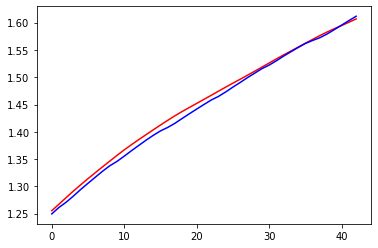

In [102]:
test_x,test_y = create(test)
pred = model_lstm.predict(test_x)
plt.plot(pred,color='r')
plt.plot(test_y,color='b')
plt.show()

In [103]:
X = np.array(df["Total Confirmed"])
X = scaler.transform(X.reshape(-1,1))
X,y = create(X)
pred_final = model_lstm.predict(X)

In [104]:
y = np.array([int(i) for i in scaler.inverse_transform(pred_final)])

In [105]:
s = "Pred Total Confirmed"
df[s] = np.nan

In [106]:
df[s][-len(y):] = y.reshape(-1)

In [107]:
df

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Pred Total Confirmed
Date,,,,,,,,
2020-01-30,2020-01-30,1,1,0,0,0,0,NaN
2020-01-31,2020-01-31,0,1,0,0,0,0,NaN
2020-02-01,2020-02-01,0,1,0,0,0,0,NaN
2020-02-02,2020-02-02,1,2,0,0,0,0,NaN
2020-02-03,2020-02-03,1,3,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
2020-11-17,2020-11-17,38548,8912697,44753,8332928,472,130441,8933326.0
2020-11-18,2020-11-18,45366,8958063,48675,8381603,586,131027,8967453.0
2020-11-19,2020-11-19,46185,9004248,45246,8426849,582,131609,9000245.0


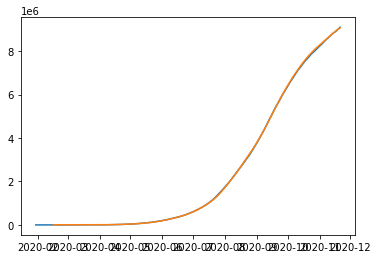

In [108]:
plt.plot(df["Total Confirmed"])
plt.plot(df[s])

In [109]:
for i in range(75):
    q = np.array([scaler.transform(np.array(df[s][-window:]).reshape(-1,1))])
    q = int(scaler.inverse_transform(model_lstm.predict(q)).reshape(-1))
    new_row = pd.DataFrame([q],columns=[s],index=[df.index[-1]+pd.Timedelta(days=1)])
    df = pd.concat([df,new_row])

<AxesSubplot:>

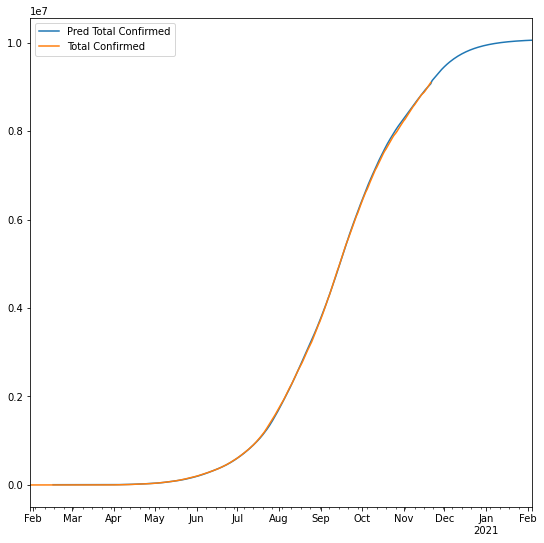

In [110]:
df[[s,"Total Confirmed"]].plot(figsize=(9,9))

In [111]:
df[[s,"Total Confirmed"]].to_csv("India_total_cases.csv")